In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [37]:
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [38]:
PATH = 'data/'
sz=224

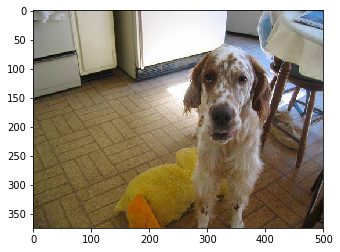

In [56]:
img = plt.imread(glob(f'{PATH}train/*.*')[1])
plt.imshow(img);

In [48]:
arch=resnet34

In [72]:
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', suffix='.jpg', tfms=tfms_from_model(arch, sz))

In [ ]:
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

In [73]:
x,y = next(iter(data.val_dl))

In [89]:
np.array(x[0,0,:,:])

array([[-0.28405, -0.5764 , -0.58403, ...,  1.99038,  1.68895,  1.58083],
       [-0.13719, -0.41353, -0.44474, ...,  1.7763 ,  1.62704,  1.26724],
       [ 0.3558 ,  0.01574, -0.48916, ...,  1.3696 ,  1.58817,  1.53822],
       ...,
       [-0.40536, -0.2734 , -0.04796, ..., -0.28135,  0.04925,  0.22878],
       [-0.05782, -0.00435,  0.05533, ..., -0.08724,  0.15417,  0.15396],
       [ 0.1181 ,  0.17079,  0.1058 , ...,  0.15721,  0.36297,  0.25039]], dtype=float32)

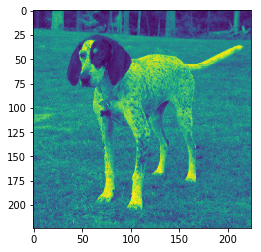

In [95]:
plt.imshow(np.array(x[1,0,:,:]));

In [71]:
glob('data/train/*')[0]

'data/train/a048795ed9051cdcf322e407293ef855.jpg'